In [216]:
import nltk
import matplotlib.pyplot as plt

In [217]:
with open ('na_zap_fronte.txt', 'r', encoding='windows-1251') as book1:
    zap_front = book1.read()
with open ('noch_v_lissabone.txt', 'r', encoding='windows-1251') as book2:
    lissabon = book2.read()
with open ('three_comrades.txt', 'r', encoding='windows-1251') as book3:
    three_comrades = book3.read()
with open ('triumfalnaya_arka.txt', 'r', encoding='windows-1251') as book4:
    triumf = book4.read()
with open ('vremya_zhit.txt', 'r', encoding='windows-1251') as book5:
    vremya = book5.read()
with open ('vzaimy.txt', 'r', encoding='windows-1251') as book6:
    vzaimy = book6.read()


In [218]:
wordtok = nltk.tokenize.RegexpTokenizer('\w+')
zap_front_tok = wordtok.tokenize(zap_front)
lissabon_tok = wordtok.tokenize(lissabon)
three_comrades_tok = wordtok.tokenize(three_comrades)
triumf_tok = wordtok.tokenize(triumf)
vremya_tok = wordtok.tokenize(vremya)
vzaimy_tok = wordtok.tokenize(vzaimy)
tok_dict = {
    "На западном фронте без перемен": zap_front_tok,
    "Три товарища": three_comrades_tok,
    "Триумфальная арка": triumf_tok,
    "Время жить и время умирать": vremya_tok,
    "Жизнь взаймы": vzaimy_tok,
    "Ночь в Лиссабоне": lissabon_tok
}


### Лексическое разнообразие 

In [219]:
def lexical_diversity(book_tok):
    unique_words = []
    book_tok = [token.lower() for token in book_tok]
    for word in book_tok:
        if word not in unique_words:
            unique_words.append(word)
    diversity = len(book_tok)/len(unique_words)
    return round(diversity,2)

ld_triumf = lexical_diversity(triumf_tok)
ld_zap_front = lexical_diversity(zap_front_tok)
ld_lissabon = lexical_diversity(lissabon_tok)
ld_three_comrades =lexical_diversity(three_comrades_tok)
ld_vremya = lexical_diversity(vremya_tok)
ld_vzaimy = lexical_diversity(vzaimy_tok)


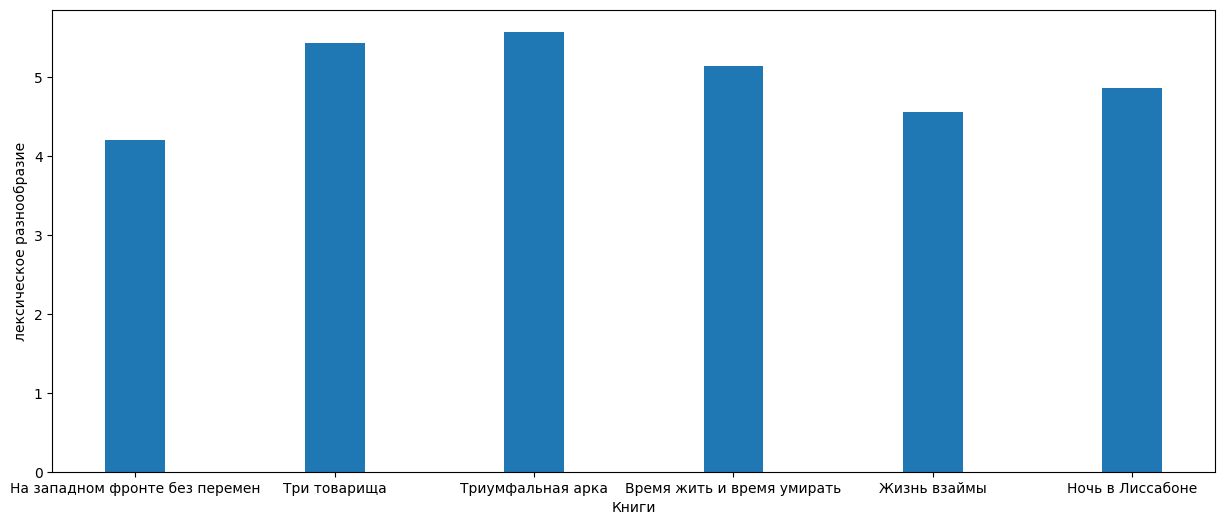

{'На западном фронте без перемен': 4.21, 'Три товарища': 5.43, 'Триумфальная арка': 5.58, 'Время жить и время умирать': 5.14, 'Жизнь взаймы': 4.56, 'Ночь в Лиссабоне': 4.86}


In [220]:
ld_dict = {
    "На западном фронте без перемен": ld_zap_front,
    "Три товарища": ld_three_comrades,
    "Триумфальная арка": ld_triumf,
    "Время жить и время умирать": ld_vremya,
    "Жизнь взаймы": ld_vzaimy,
    "Ночь в Лиссабоне": ld_lissabon
}

plt.figure(figsize=(15, 6))
plt.bar(ld_dict.keys(), ld_dict.values(), width=0.3)

plt.xlabel('Книги')
plt.ylabel('лексическое разнообразие')

plt.show()
print(ld_dict)


Судя по данным, можно сделать вывод о том, что произведения Ремарка стали лексически разнообразнее с написанием книги Три Товарища. Триумфальна арка имеет самое высокое лексическое разнообразие среди выборки. 

### Исследование на части речи 

Количество слов в книгах:

In [9]:
for name, tok_book in tok_dict.items():
    print(name)
    print(len(tok_book))

На западном фронте без перемен
58654
Три товарища
797905
Триумфальная арка
126393
Время жить и время умирать
92260
Жизнь взаймы
57762
Ночь в Лиссабоне
432618


In [221]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()

#функция для подсчета процентного соотношения частей речи к общему количеству слов в тексте 

def part_of_speech(book_tok):
    pos_count={}
    for token in book_tok:
        parsed_word = morph.parse(token)[0]
        pos = parsed_word.tag.POS  # Определение части речи
        if pos: #если часть речи определилась 
            if pos in pos_count: #проверка есть ли эта часть речи в словаре 
                pos_count[pos] += 1 #значение увеличивается на 1
            else:
                pos_count[pos] = 1 #добавляется часть речи со значением 1 
    for pos, count in pos_count.items():
        pos_count[pos] = round(count / len(book_tok),3)
    sorted_pos_count = {n: pos_count[n] for n in sorted(pos_count)}
    return sorted_pos_count
    

In [222]:
pos_zap_front = part_of_speech(zap_front_tok)
pos_triumf = part_of_speech(triumf_tok)
pos_lissabon = part_of_speech(lissabon_tok)
pos_three_comrades =part_of_speech(three_comrades_tok)
pos_vremya = part_of_speech(vremya_tok)
pos_vzaimy = part_of_speech(vzaimy_tok)

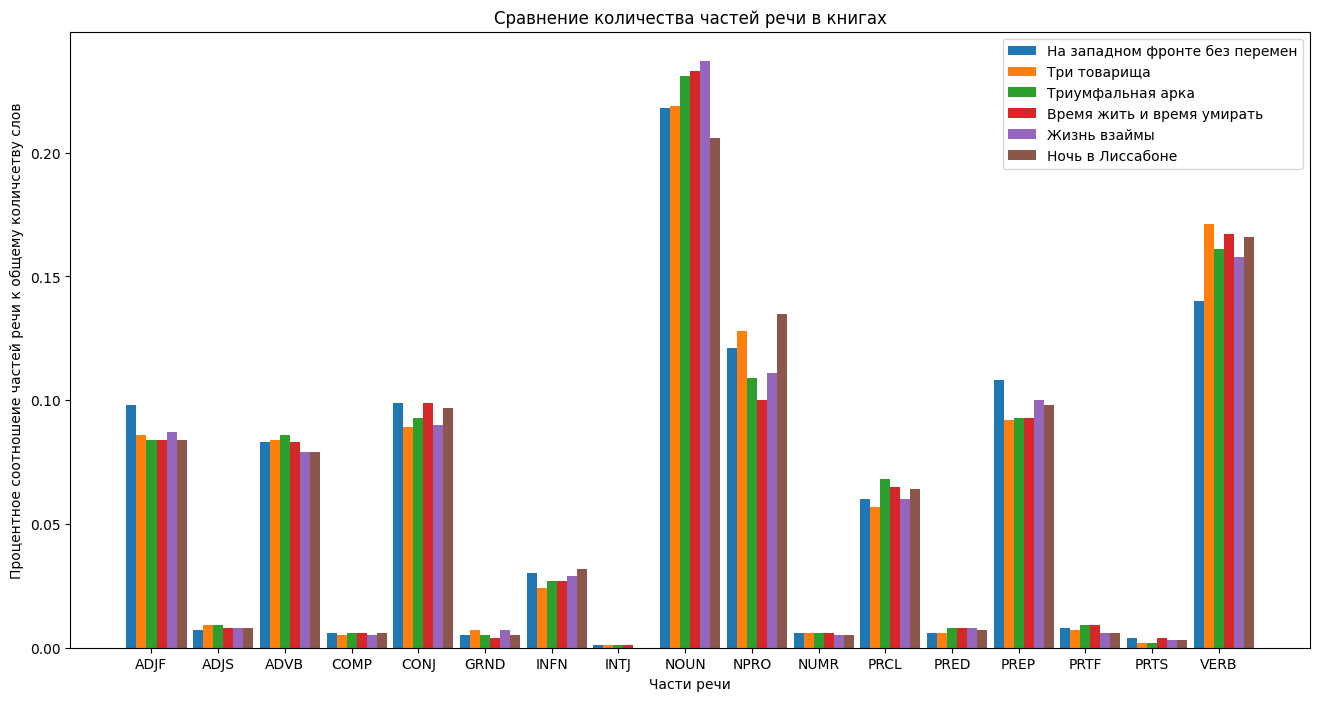

In [227]:
#строим график 

import numpy as np

dicts = [pos_zap_front, pos_three_comrades, pos_triumf, pos_vremya, pos_vzaimy, pos_lissabon]

keys = list(dicts[0].keys()) #список ключей
values_list = [[dict[key] for key in keys] for dict in dicts] # получаем список значений

fig, ax = plt.subplots(figsize=(16, 8))  # ширина высота
bar_width = 0.15
index = np.arange(len(keys))
book_names = ["На западном фронте без перемен","Три товарища","Триумфальная арка","Время жить и время умирать","Жизнь взаймы","Ночь в Лиссабоне"]

# стоблики для каждого словаря 
for i, values in enumerate(values_list): 
    plt.bar(index + i * bar_width, values, bar_width, label=book_names[i])

plt.xlabel('Части речи')
plt.ylabel('Процентное соотношеие частей речи к общему количсетву слов')
plt.title('Сравнениe количества частей речи в книгах')
plt.xticks(index+0.3, keys)
plt.legend()

plt.show()

Наиболее часто встречающаяся часть речи во всех книгах - существительное. При чем количество существительных в книгах Ремарка росло до написания книги Жизнь Взаймы, и резко пошла на спад после, что видно по количеству существительных в книге Ночь в Лиссабоне <br>
Глаголы занимают второе место по частоте встречаемости. При чем разница между количеством существительных и глаголов в книгах достаточно большая. Больше всего глаголов в книгах Ночь в Лиссабоне, Три товарища, и Время жить и время умирать, что может указывать на более динамичный стиль или большее количество действий в этих книгах по сравнению с другими книгами в выборке. <br>
При анализе прилагательных, можно увидеть, что после книги На западном фронте без перемен в книгах их стало меньше.





### Наиболее часто встречаемые слова 

In [224]:
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

custom_stop_word = ['это', 'нам', 'x', 'нас', 'ещё', "наш", "который", 'всё',"свой", 'весь', 'гребро']
stop_words = set(stopwords.words('russian'))
stop_words.update(custom_stop_word)

def filtered_book(book_tok):

    book_tok = [token.lower() for token in book_tok]
    morph = pymorphy3.MorphAnalyzer()
    lemmatized_book = [morph.parse(word)[0].normal_form for word in book_tok]
    filtered_tokens = [token.strip() for token in lemmatized_book if token not in stop_words]

    return filtered_tokens
    
def common_words(filtered_tokens):
    
    common_words = Counter(filtered_tokens)
    return common_words.most_common(5)


На западном фронте без перемен
[('мочь', 234), ('говорить', 220), ('рука', 177), ('кат', 168), ('человек', 152)]


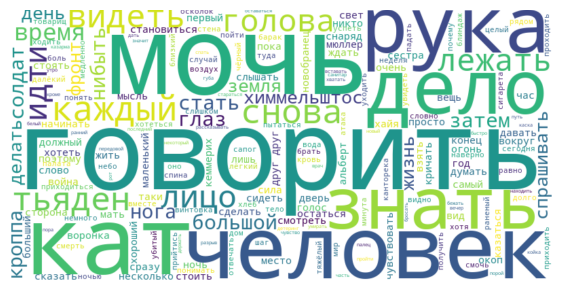

Три товарища
[('сказать', 1305), ('пат', 530), ('мочь', 484), ('спросить', 405), ('кестер', 381)]


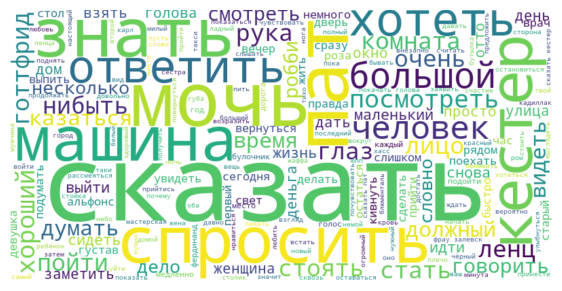

Триумфальная арка
[('равик', 1872), ('сказать', 970), ('мочь', 554), ('знать', 501), ('жоана', 417)]


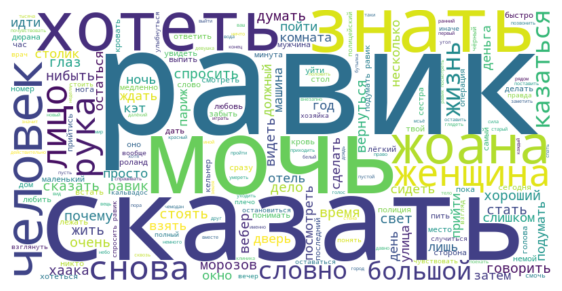

Время жить и время умирать
[('сказать', 583), ('мочь', 474), ('элизабет', 373), ('знать', 290), ('человек', 254)]


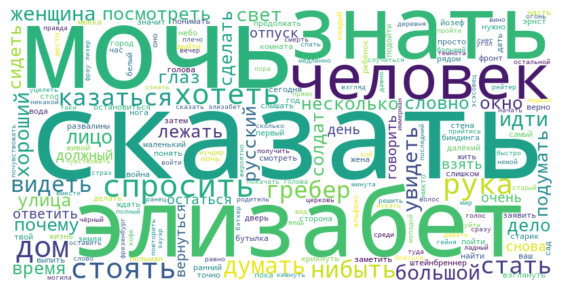

Жизнь взаймы
[('лилиан', 899), ('клерфэ', 682), ('сказать', 442), ('мочь', 244), ('хотеть', 234)]


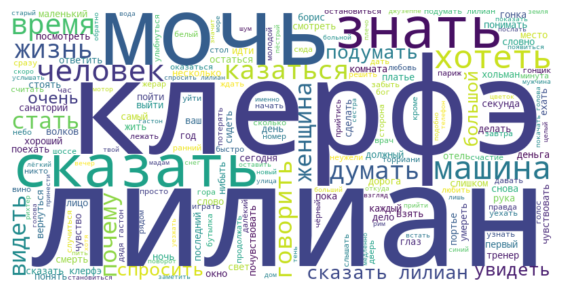

Ночь в Лиссабоне
[('сказать', 576), ('мочь', 379), ('знать', 298), ('елена', 241), ('шварц', 211)]


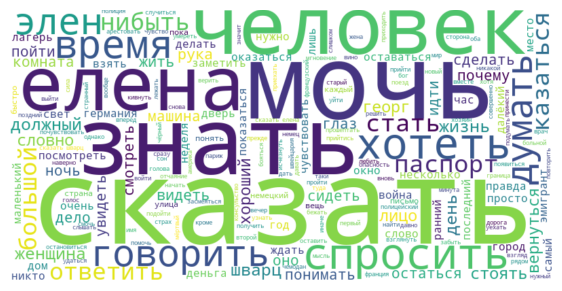

In [225]:
for name, tok_book in tok_dict.items():
    print(name)
    print(common_words(filtered_book(tok_book)))
    text = " ".join(filtered_book(tok_book))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Во всех книгах среди топ 5 часто встречаемых слово есть слово "мочь". Также в часто всречаемых словах присутсвуют имена персонажей.<br>
Интересный кейс - книга Время жить и время умирать. До включения слова 'гребро' в список стоп слов, оно было самым часто встречающимся в книге. Я предполагаю, что это была попытка привести имя "Гребер"  к начальной форме :) Можно сделать вывод, что слово "Гребер" все-таки самое часто встречающееся в книге.


### Интересные наблюдения :) <br>

Слово кальвадос встречается в Триумфальной арке 89 раз!<br>
Во всех книгах хотя бы раз упоминаетс слово туберкулез 

In [229]:
def word_counter(book_tok):
    calvados_counter = 0
    tuberculosis_counter = 0
    book_tok = [token.lower() for token in book_tok]
    lemmatized_book = [morph.parse(word)[0].normal_form for word in book_tok]
    for word in lemmatized_book:
        if word == "кальвадос":
            calvados_counter+=1
        elif word == "туберкулёз":
            tuberculosis_counter+=1
    return f'количество слов туберкулез: {tuberculosis_counter}\nколичество слов кальвадос: {calvados_counter}'


for name, tok_book in tok_dict.items():
    print(name)
    print(word_counter(tok_book))

На западном фронте без перемен
количество слов туберкулез: 1
количество слов кальвадос: 0
Три товарища
количество слов туберкулез: 1
количество слов кальвадос: 0
Триумфальная арка
количество слов туберкулез: 6
количество слов кальвадос: 89
Время жить и время умирать
количество слов туберкулез: 2
количество слов кальвадос: 0
Жизнь взаймы
количество слов туберкулез: 2
количество слов кальвадос: 1
Ночь в Лиссабоне
количество слов туберкулез: 1
количество слов кальвадос: 0
